# Importing Libraries and Files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)

In [3]:
gen_data = pd.read_csv('Plant_1_Generation_Data.csv')
wthr_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [4]:
gen_data.sample(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
36957  02-06-2020 19:45   4135001  z9Y9gH1T5YWrNuG     0.000     0.000   
47052  07-06-2020 16:30   4135001  adLQvlD726eNBSB  3469.286   340.543   
16172  23-05-2020 12:45   4135001  iCRJl6heRkivqQ3  9029.750   883.375   
37886  03-06-2020 06:30   4135001  3PZuoBAID5Wc2HD   616.571    59.671   
48151  08-06-2020 05:00   4135001  ZoEaEvLYb1n2sOq     0.000     0.000   

       DAILY_YIELD  TOTAL_YIELD  
36957     7446.000    7.147e+06  
47052     7916.286    6.453e+06  
16172     4952.250    7.240e+06  
37886       15.714    7.129e+06  
48151        0.000    7.273e+06

In [5]:
wthr_data.sample(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
2270  2020-06-08 12:00:00   4135001  HmiyD2TTLFNqkNe               28.984   
2661  2020-06-12 13:45:00   4135001  HmiyD2TTLFNqkNe               28.101   
2242  2020-06-08 05:00:00   4135001  HmiyD2TTLFNqkNe               21.700   
208   2020-05-17 06:45:00   4135001  HmiyD2TTLFNqkNe               22.949   
2537  2020-06-11 06:45:00   4135001  HmiyD2TTLFNqkNe               21.874   

      MODULE_TEMPERATURE  IRRADIATION  
2270              47.150        0.760  
2661              44.813        0.669  
2242              20.267        0.000  
208               22.598        0.068  
2537              21.782        0.035

# Date & Time Adjustment

In [6]:
gen_data['DATE_TIME'] = pd.to_datetime(gen_data['DATE_TIME'], format='%d-%m-%Y %H:%M')
wthr_data['DATE_TIME'] = pd.to_datetime(wthr_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Merging Power Generation and Weather Sensor Data

In [7]:
solar = pd.merge(gen_data.drop(columns = ['PLANT_ID']), wthr_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
solar.sample(5).style.background_gradient(cmap='cool')

# Adding Seperate Time and Data Columns

In [8]:

solar["DATE"] = pd.to_datetime(solar["DATE_TIME"]).dt.date
solar["TIME"] = pd.to_datetime(solar["DATE_TIME"]).dt.time
solar['DAY'] = pd.to_datetime(solar['DATE_TIME']).dt.day
solar['MONTH'] = pd.to_datetime(solar['DATE_TIME']).dt.month


solar['HOURS'] = pd.to_datetime(solar['TIME'],format='%H:%M:%S').dt.hour
solar['MINUTES'] = pd.to_datetime(solar['TIME'],format='%H:%M:%S').dt.minute
solar['TOTAL MINUTES PASS'] = solar['MINUTES'] + solar['HOURS']*60


solar["DATE_STRING"] = solar["DATE"].astype(str) # add column with date as string
solar["HOURS"] = solar["HOURS"].astype(str)
solar["TIME"] = solar["TIME"].astype(str)

solar.head(2)

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6.260e+06   
1 2020-05-15  1IF53ai7Xc0U56Y       0.0       0.0          0.0    6.184e+06   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0               25.184              22.858          0.0  2020-05-15  00:00:00   
1               25.184              22.858          0.0  2020-05-15  00:00:00   

   DAY  MONTH HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  
0   15      5     0        0                   0  2020-05-15  
1   15      5     0        0                   0  2020-05-15

In [9]:

solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   SOURCE_KEY           68774 non-null  object        
 2   DC_POWER             68774 non-null  float64       
 3   AC_POWER             68774 non-null  float64       
 4   DAILY_YIELD          68774 non-null  float64       
 5   TOTAL_YIELD          68774 non-null  float64       
 6   AMBIENT_TEMPERATURE  68774 non-null  float64       
 7   MODULE_TEMPERATURE   68774 non-null  float64       
 8   IRRADIATION          68774 non-null  float64       
 9   DATE                 68774 non-null  object        
 10  TIME                 68774 non-null  object        
 11  DAY                  68774 non-null  int32         
 12  MONTH                68774 non-null  int32         
 13  HOURS                68774 non-

In [10]:

solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [11]:

solar.describe().style.background_gradient(cmap='rainbow')


# Converting Catergorical Data to Numerical Data

In [23]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(solar['SOURCE_KEY'])
solar.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6.260e+06   
1 2020-05-15  1IF53ai7Xc0U56Y       0.0       0.0          0.0    6.184e+06   
2 2020-05-15  3PZuoBAID5Wc2HD       0.0       0.0          0.0    6.988e+06   
3 2020-05-15  7JYdWkrLSPkdwr4       0.0       0.0          0.0    7.603e+06   
4 2020-05-15  McdE0feGgRqW7Ca       0.0       0.0          0.0    7.159e+06   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0               25.184              22.858          0.0  2020-05-15  00:00:00   
1               25.184              22.858          0.0  2020-05-15  00:00:00   
2               25.184              22.858          0.0  2020-05-15  00:00:00   
3               25.184              22.858          0.0  2020-05-15  00:00:00   
4               25.184              22.858          0.0  2020-05-15  00:00:00   

   DAY  MONTH HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  \
0   15      5     0        0                   0  2020-05-15   
1   15      5     0        0                   0  2020-05-15   
2   15      5     0        0                   0  2020-05-15   
3   15      5     0        0                   0  2020-05-15   
4   15      5     0        0                   0  2020-05-15   

   SOURCE_KEY_NUMBER  
0                  0  
1                  1  
2                  2  
3                  3  
4                  4

# Data Visualization

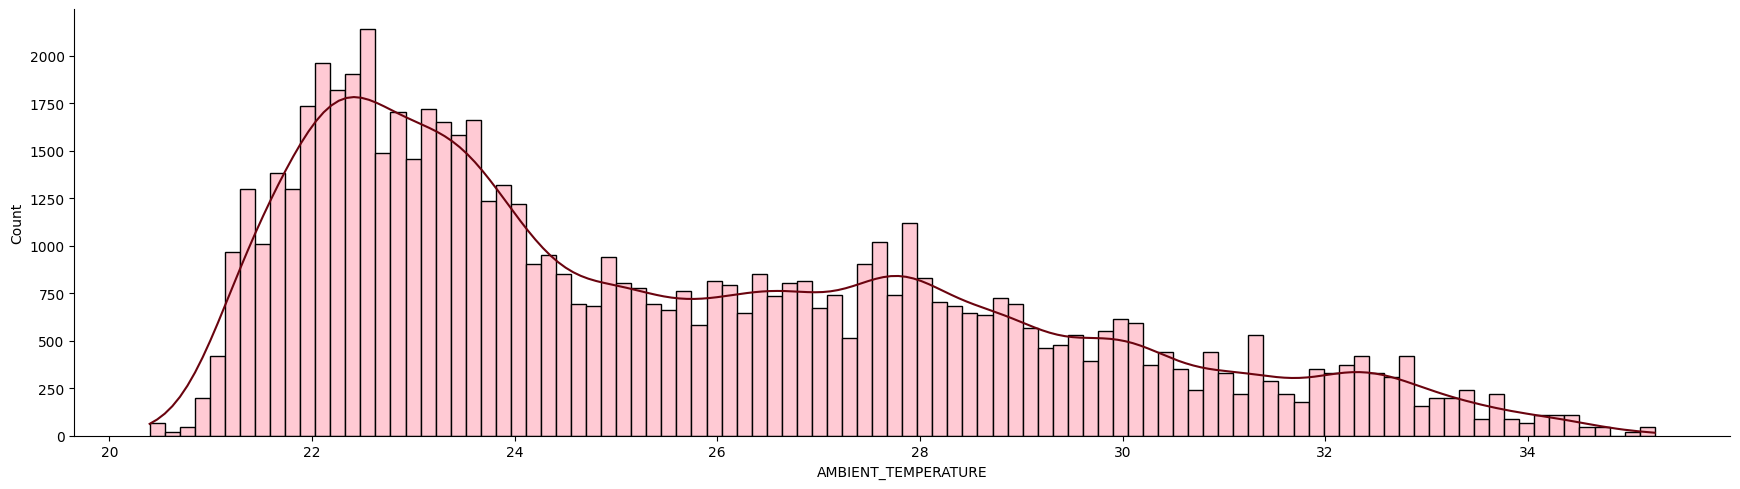

In [14]:
sns.displot(data=solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "#6a040f", facecolor = "#ffcad4",height = 5, aspect = 3.5);

In [15]:
solar['DATE'].nunique()

34

# Multiple Plotting of DC_POWER generation on per day basis.

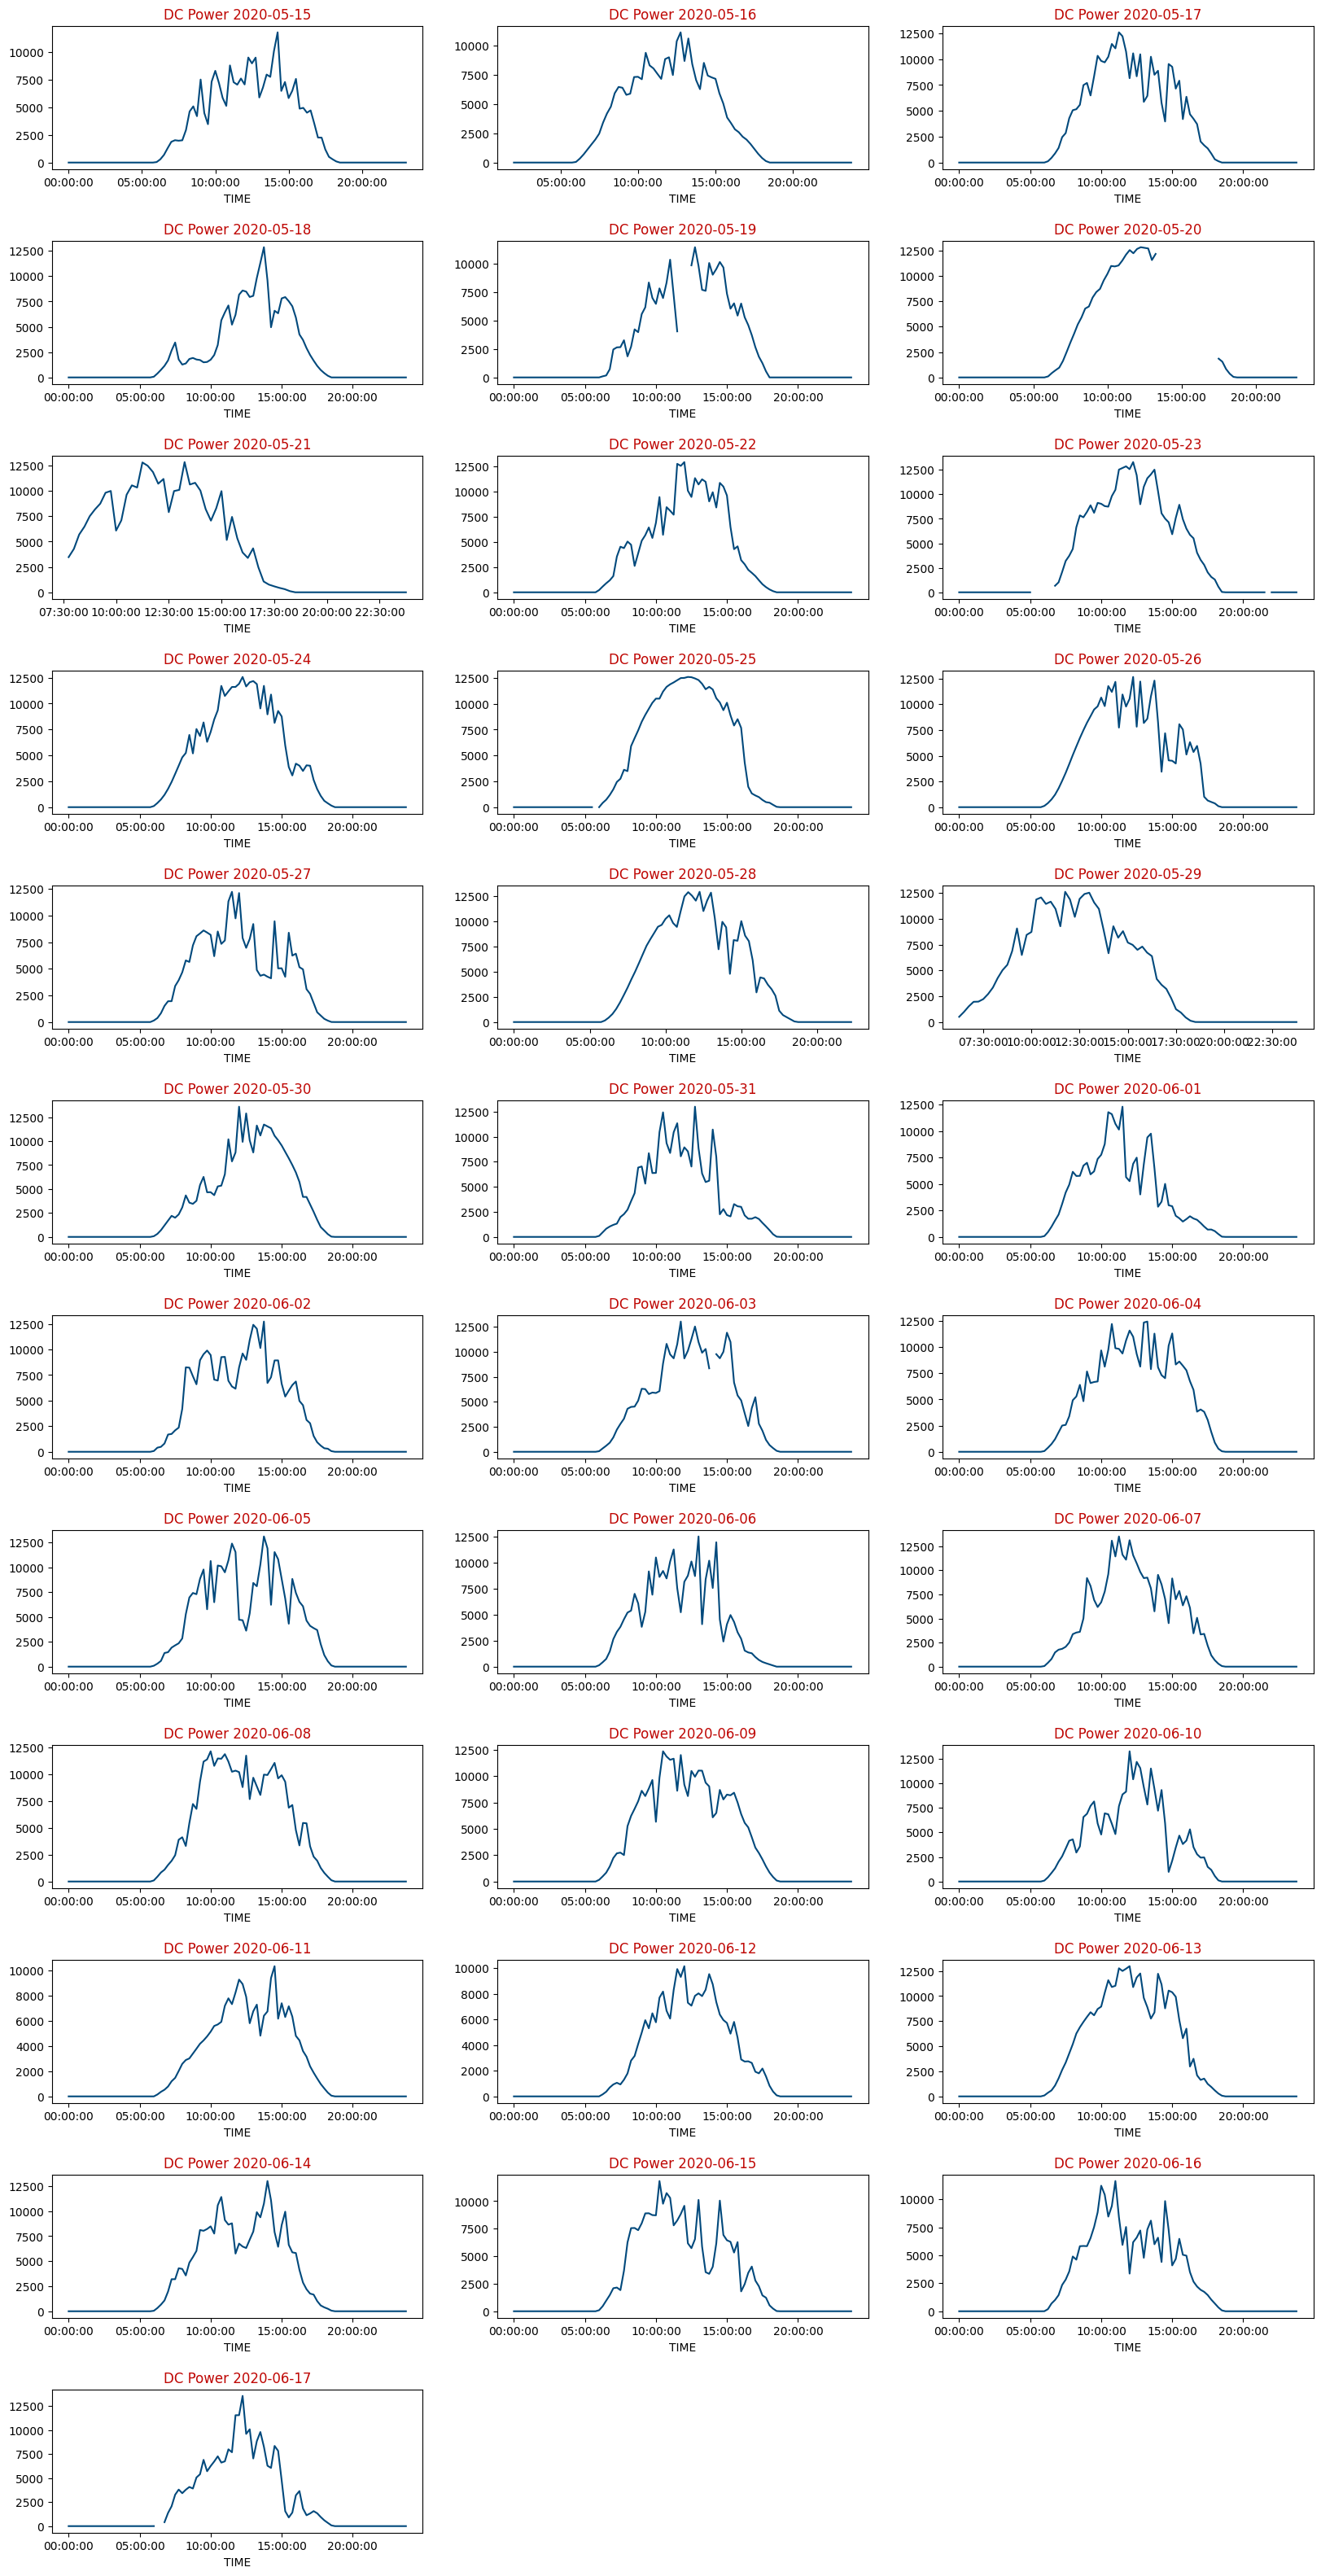

In [16]:
solar_dc = solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='#01497c')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='#bf0603')

daywise_plot(data=solar_dc, row=12, col=3)

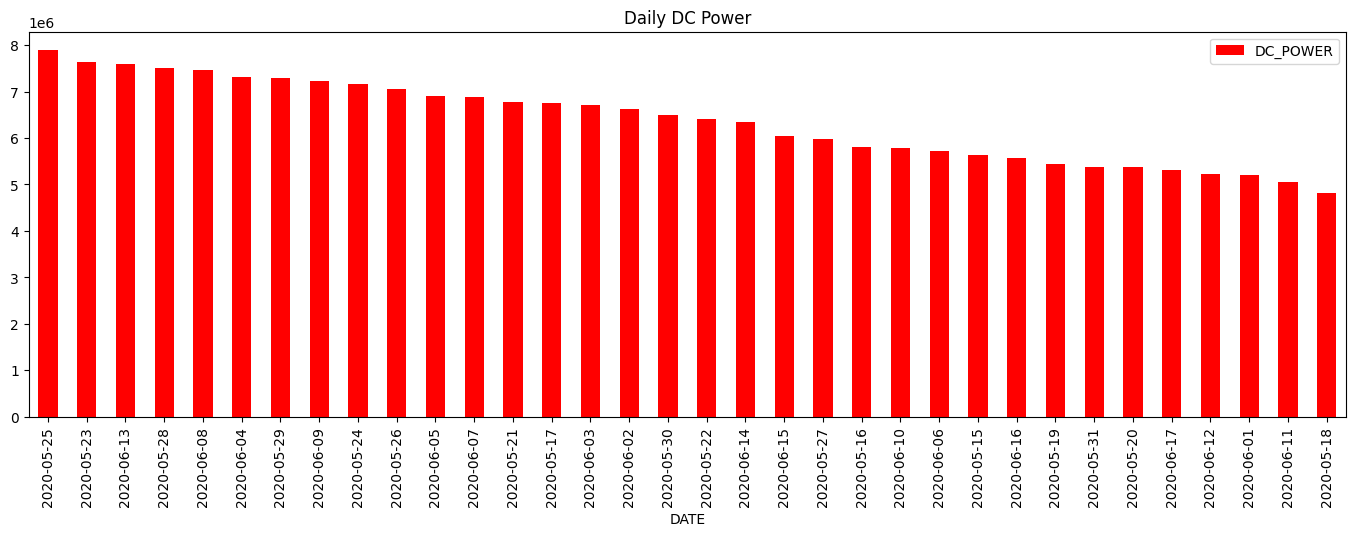

In [17]:
daily_dc = solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

# Multiple Plotting of IRRADIATION generation on per day basis.

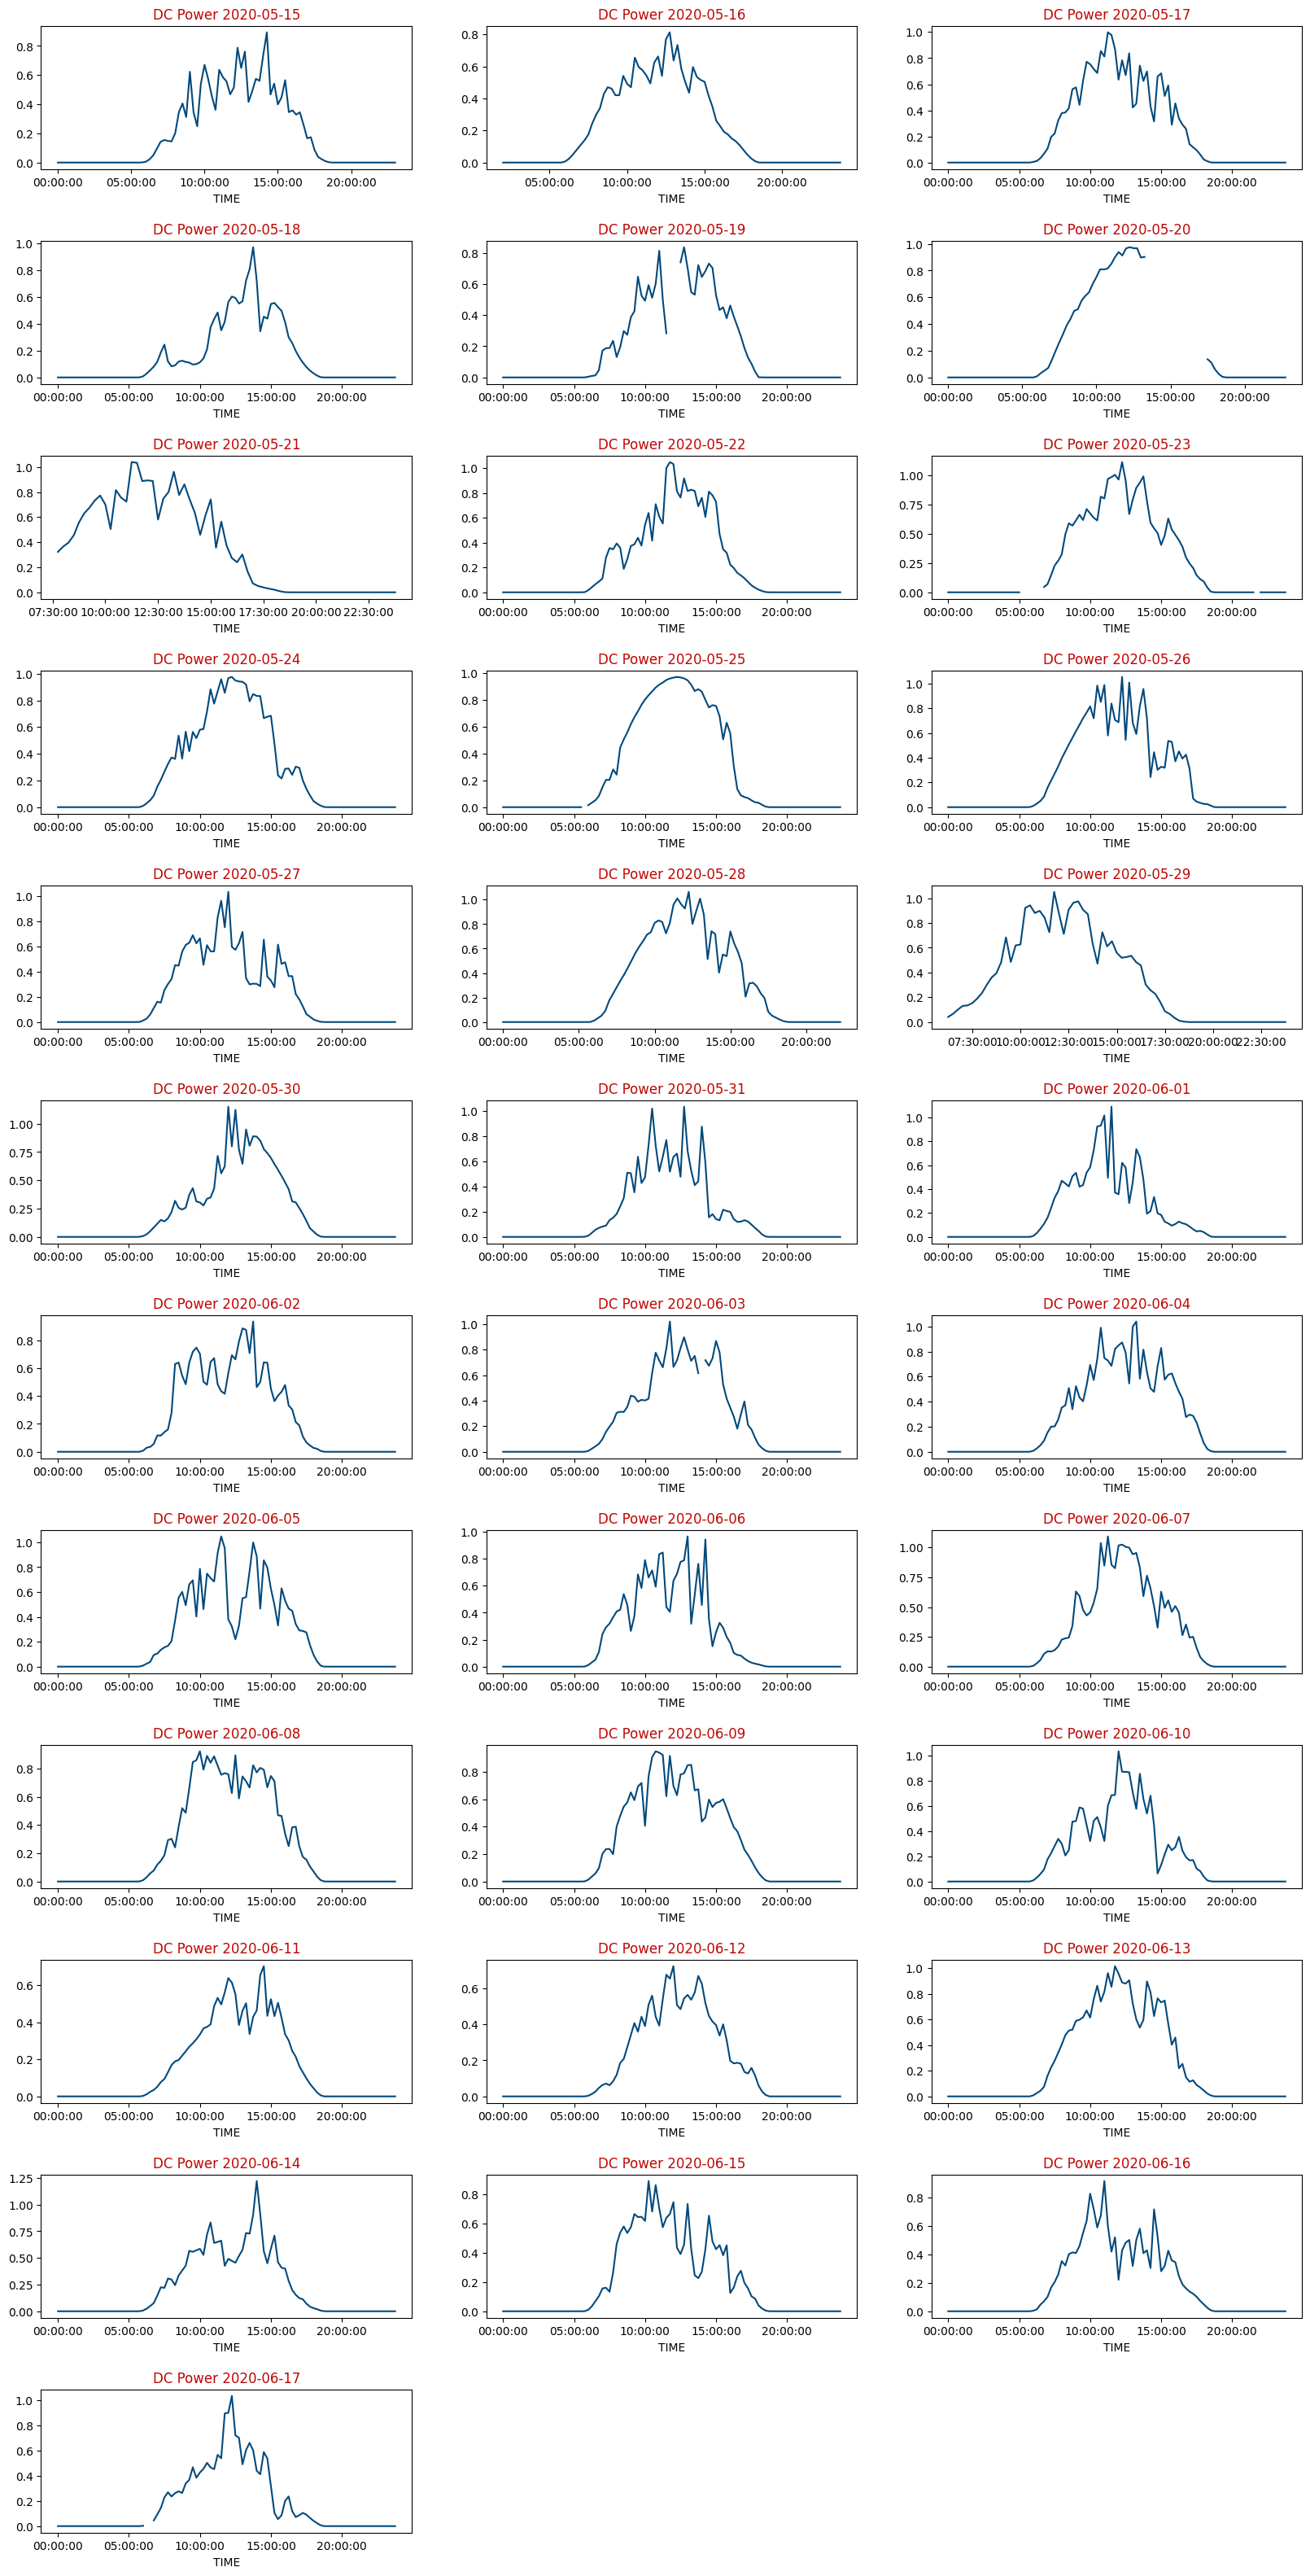

In [18]:
solar_irrad = solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='#01497c')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='#bf0603')

daywise_plot(data=solar_irrad, row=12, col=3)

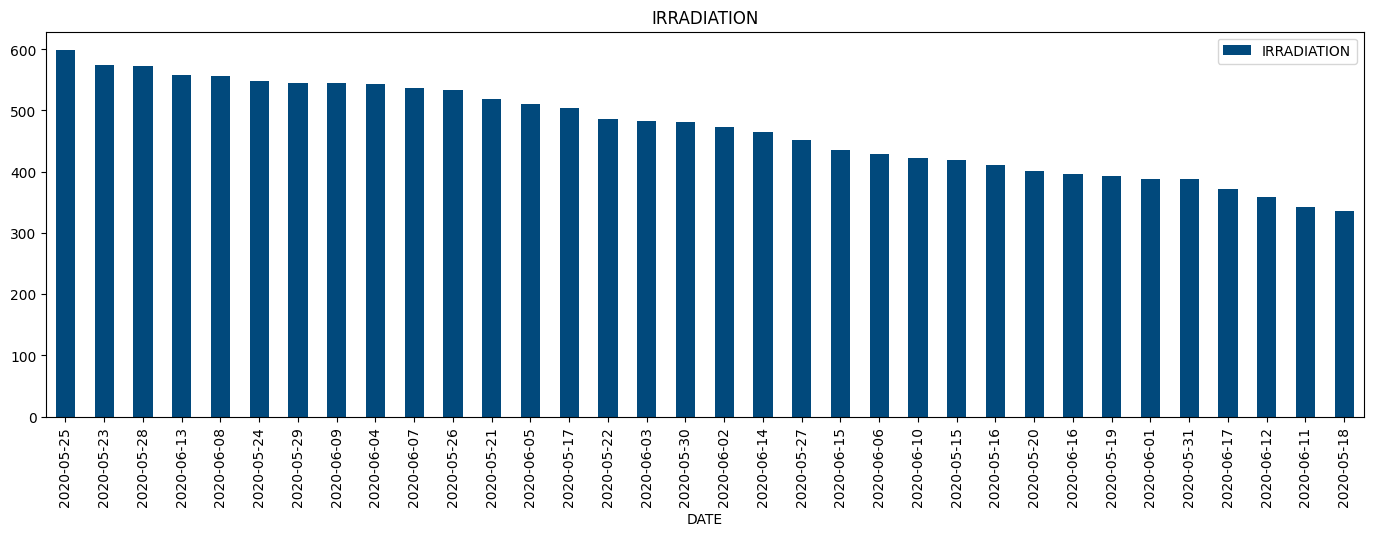

In [19]:
daily_irradiation = solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='#01497c')
plt.title('IRRADIATION')
plt.show()

# Multiple Plotting of Ambient Temperature on per day basis.

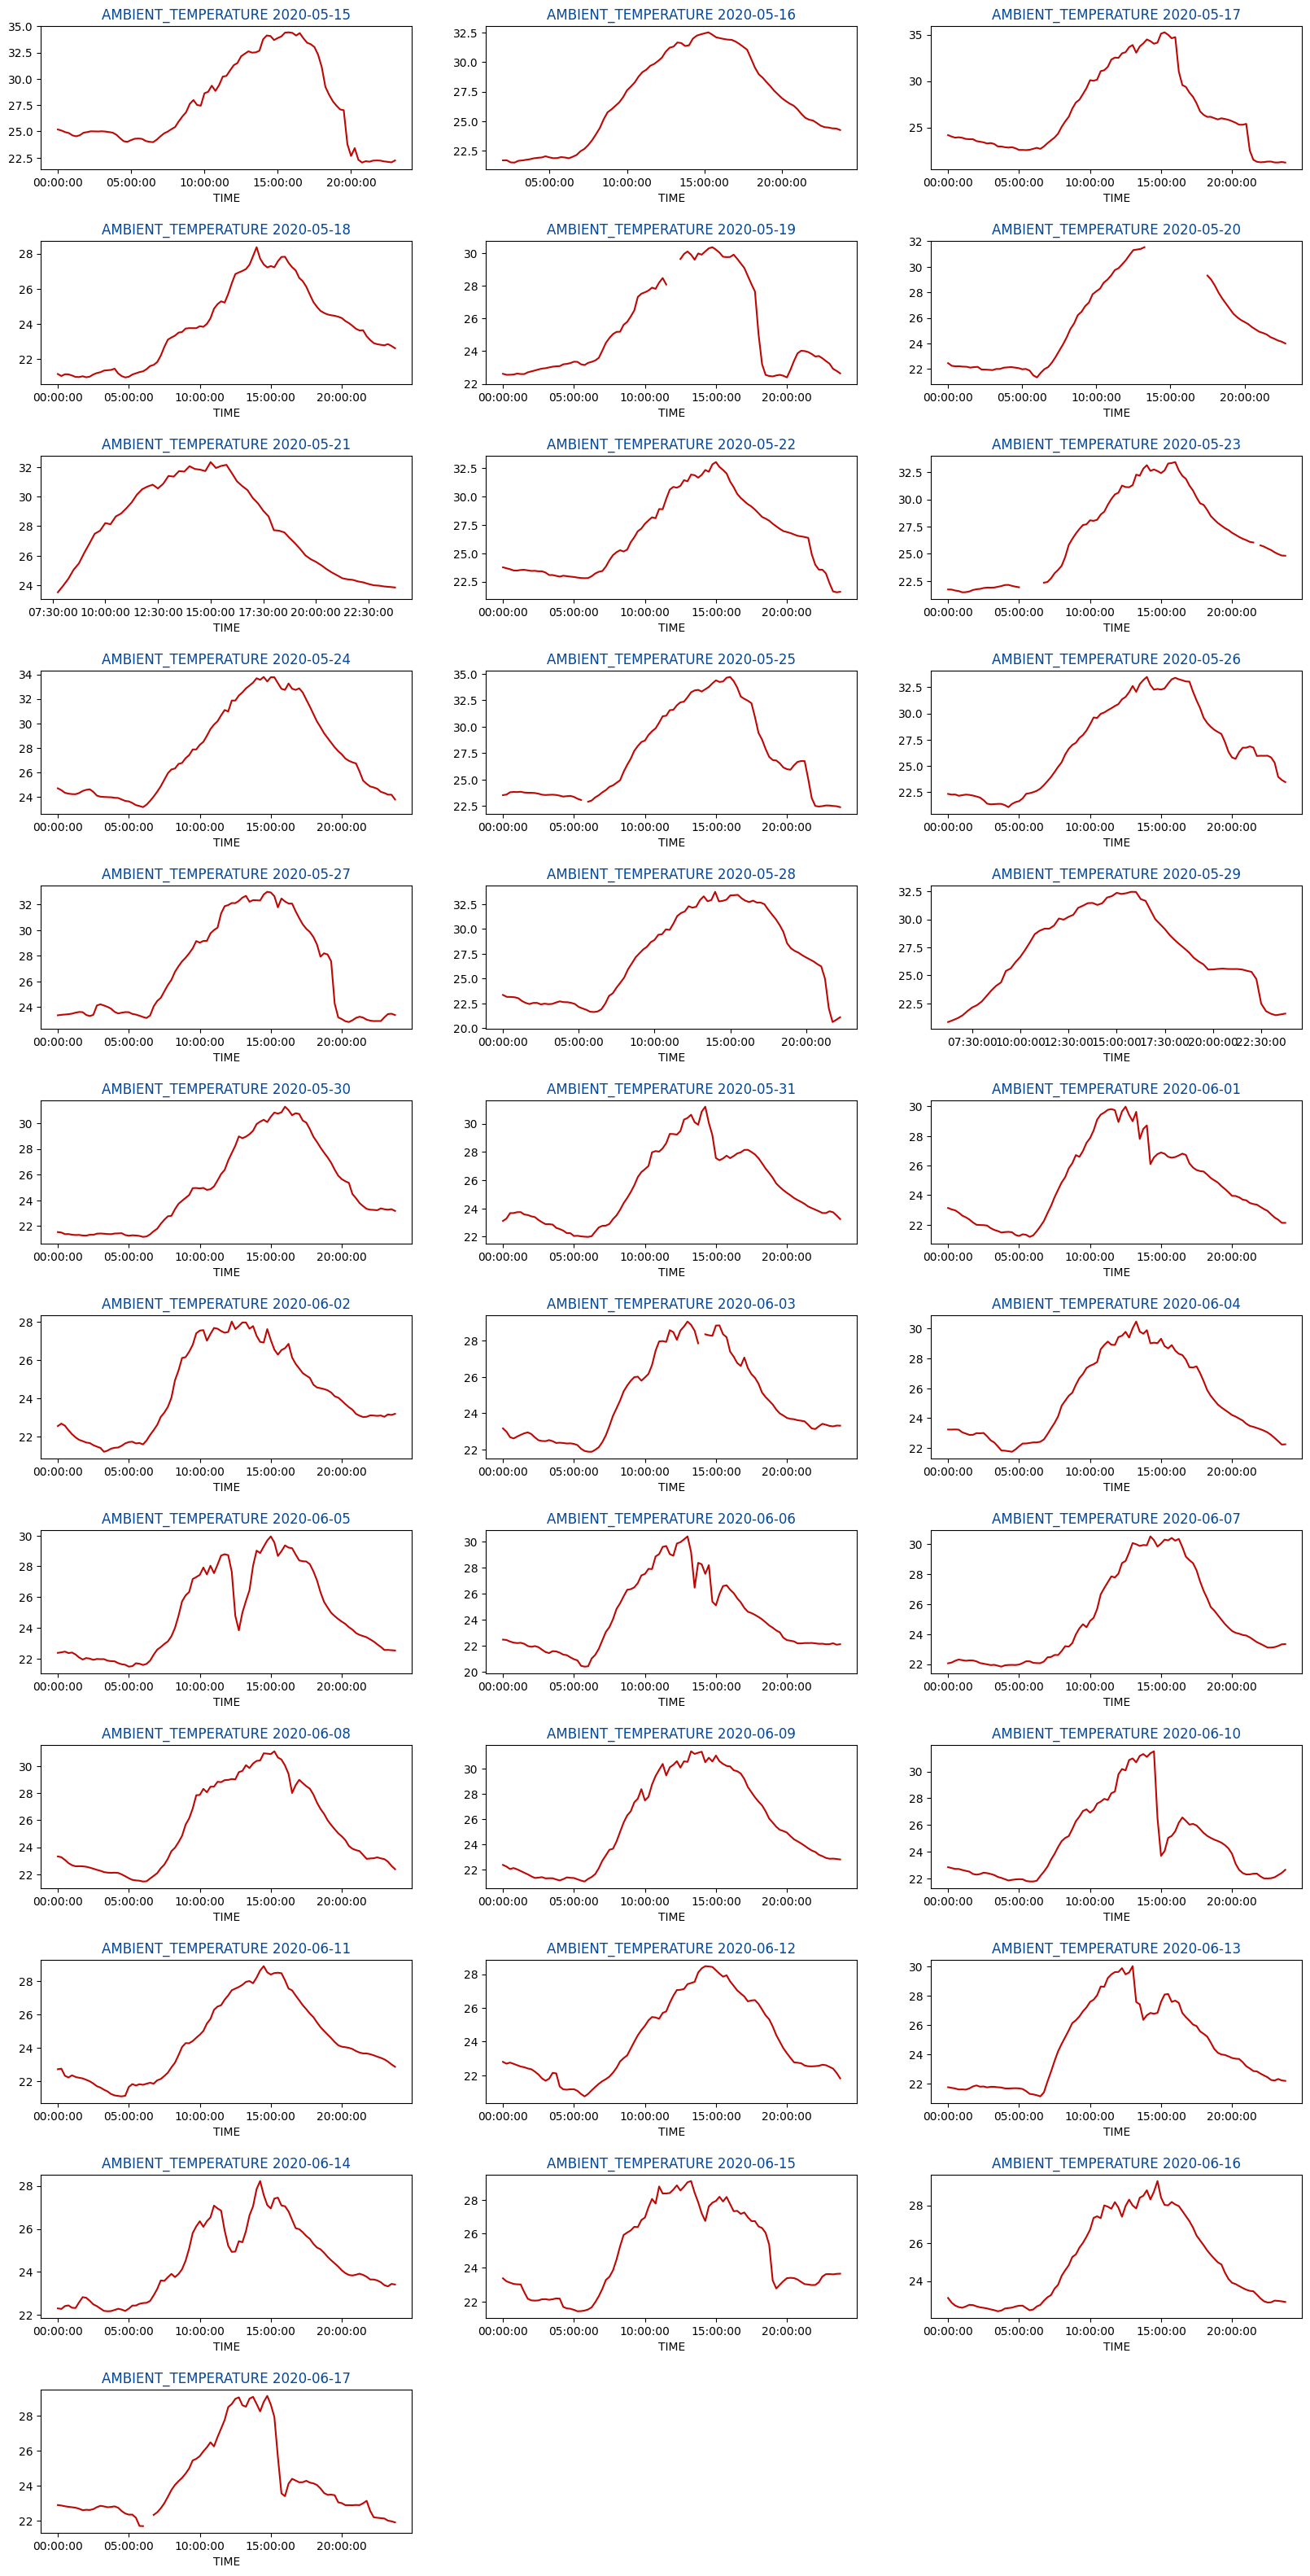

In [20]:
solar_ambiant_temp = solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='#bf0603')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='#01479c')

daywise_plot(data=solar_ambiant_temp, row=12, col=3)

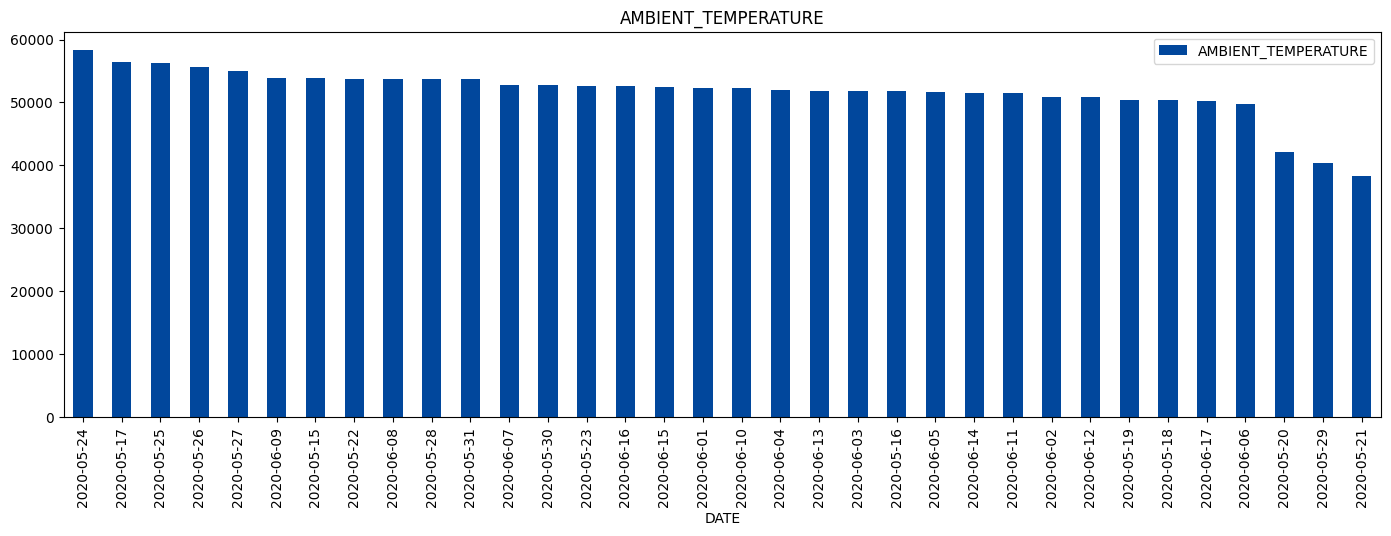

In [21]:
daily_ambient_temp = solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='#01479c')
plt.title('AMBIENT_TEMPERATURE')
plt.show()


# Highest Average on a Particular Day

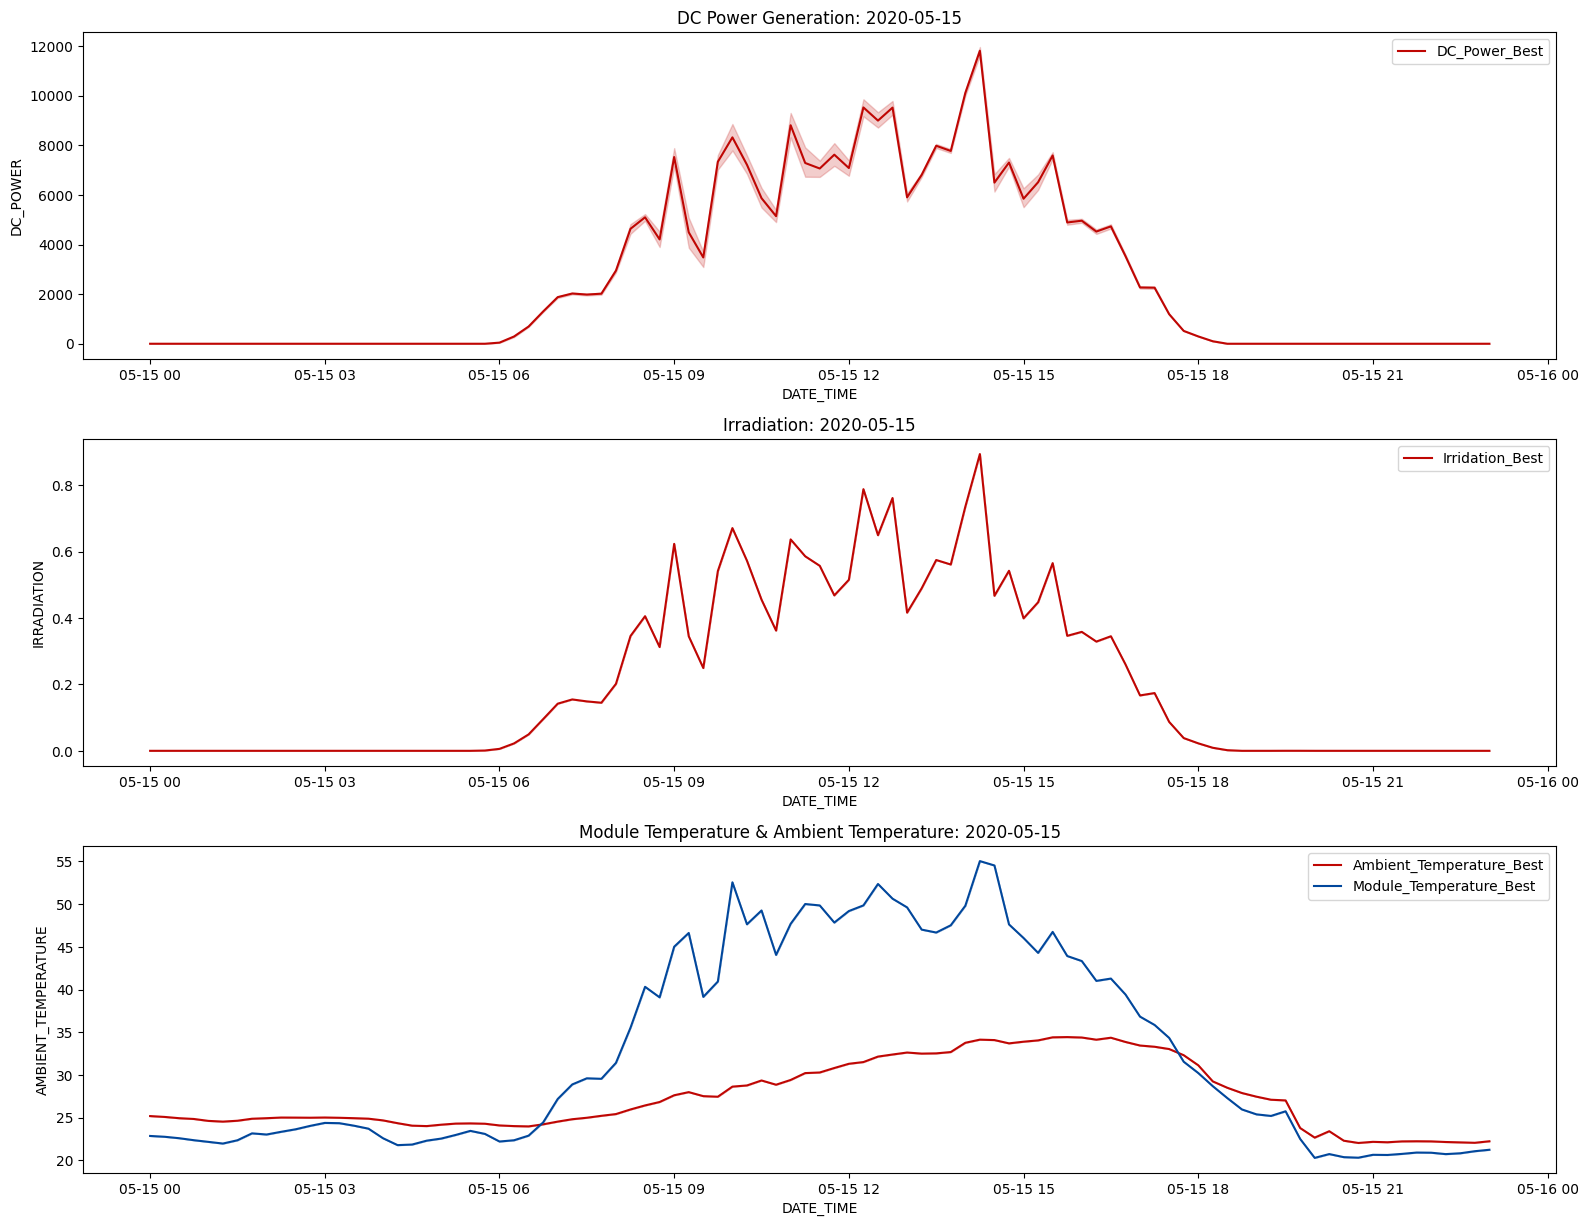

In [32]:
plt.figure(figsize=(16, 16))

date = ["2020-05-15"]

plt.subplot(411)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best", color='#bf0603')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Best", color='#bf0603')
plt.title("Irradiation: {}".format(date[0]))


plt.subplot(413)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best", color='#bf0603')
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best", color='#01479c')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()

Low Fluctuations and close to ideal graph

# Lowest Average on a Particular Day

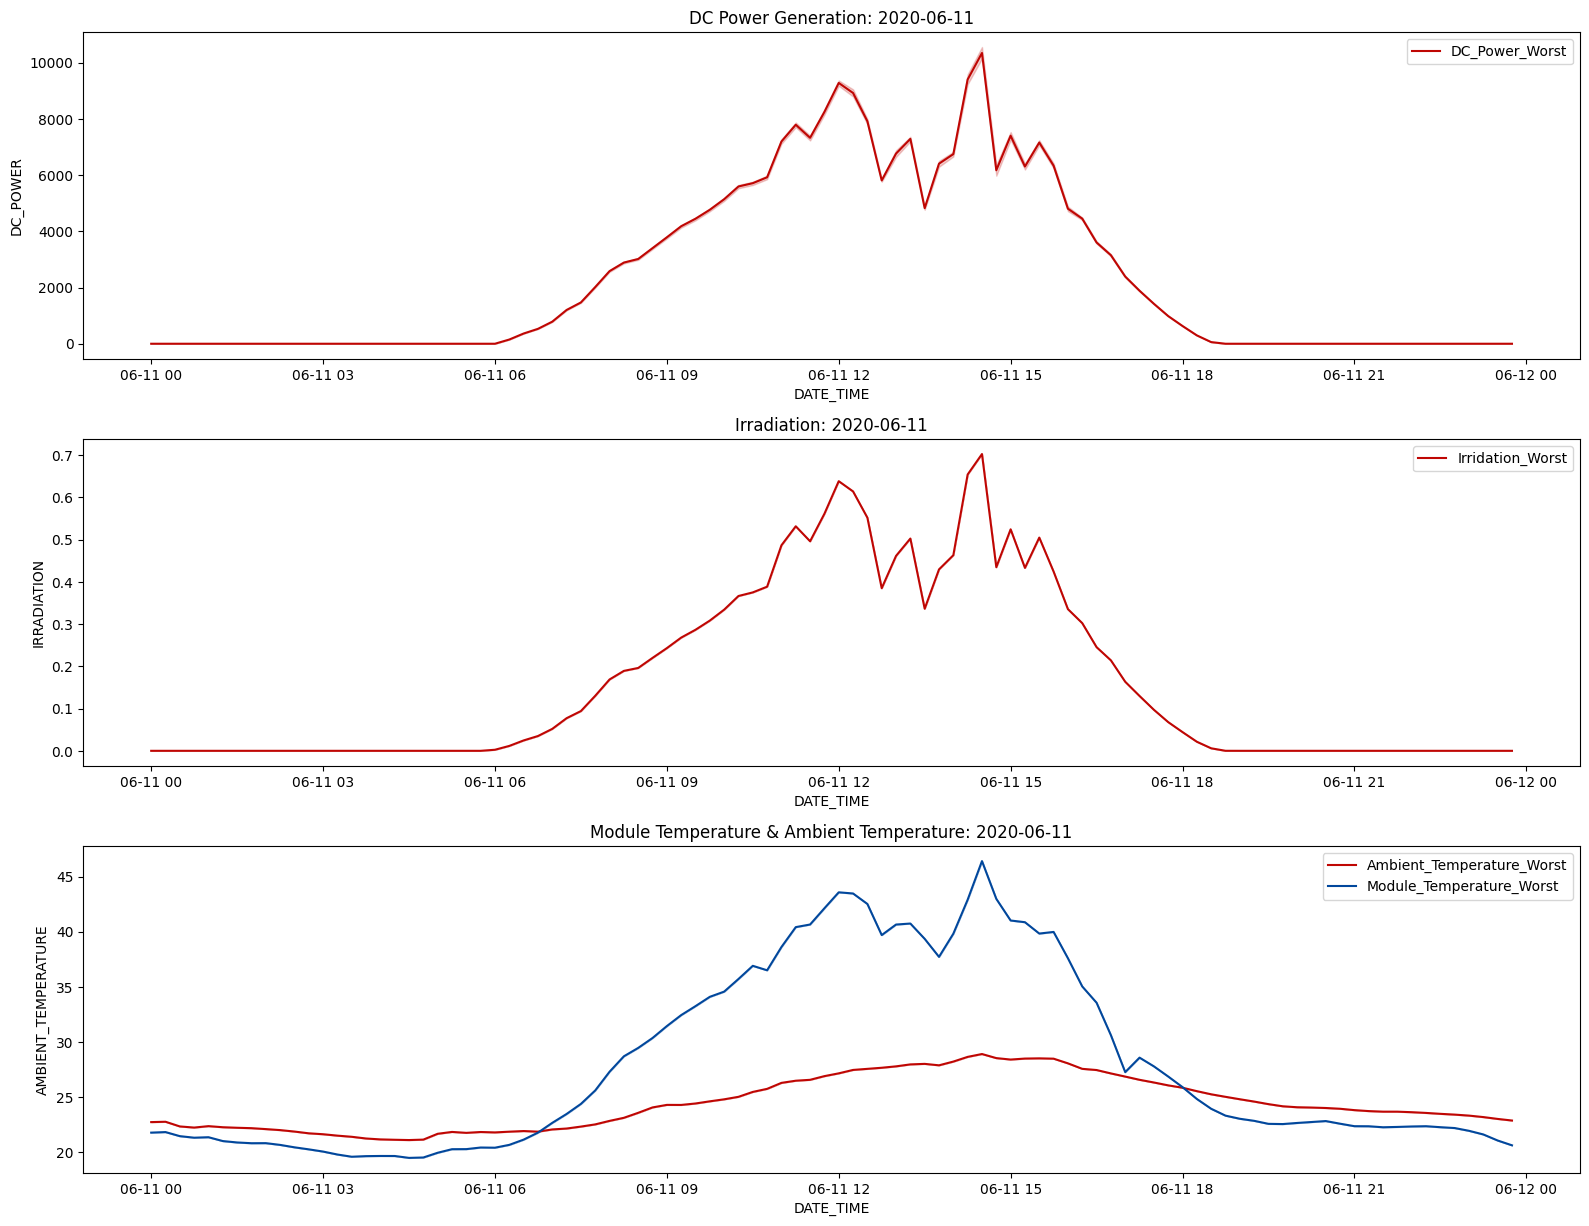

In [22]:

plt.figure(figsize=(16, 16))

date = ["2020-06-11"]


plt.subplot(411)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Worst", color='#bf0603')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Worst", color='#bf0603')
plt.title("Irradiation: {}".format(date[0]))


plt.subplot(413)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Worst", color='#bf0603')
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Worst", color='#01479c')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()


Very Large Fluctuations in both DC_Power and Irradiation

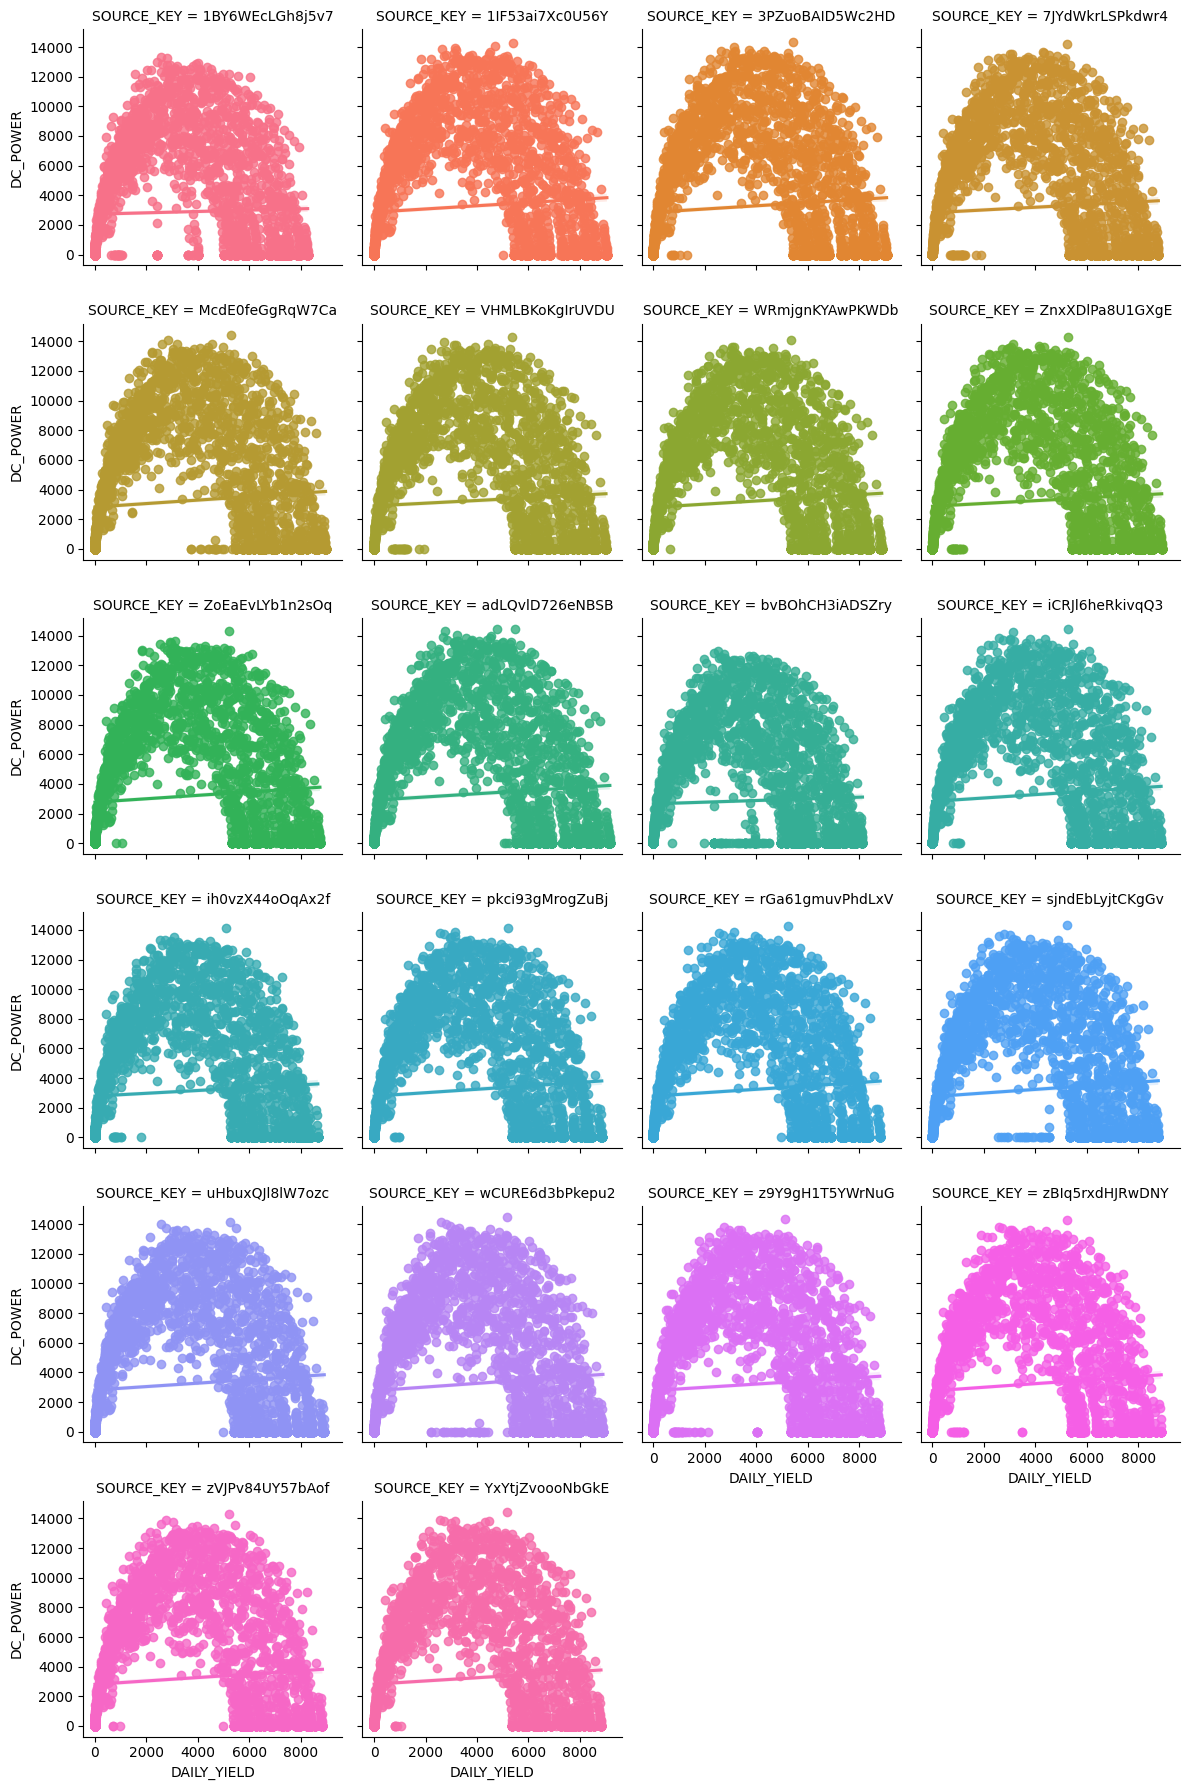

In [34]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=solar,fit_reg=True);

# Solar Power Plant Inverter Efficiency Calculation


In [25]:
solar_dc_power = solar[solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = solar[solar['AC_POWER'] > 0]['AC_POWER'].values

In [26]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  9.750 %


In [27]:
AC_list=[]
for i in solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
AC_list.sort()
AC_list.reverse()
len(AC_list)

36823

In [28]:
DC_list=[]
for i in solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

36823

[8.75, 8.875, 8.875, 9.0, 9.25, 9.5, 9.5, 9.625, 10.0, 10.25, 10.625, 10.625, 11.125, 11.14285714, 11.75, 11.75, 11.75, 11.85714286, 12.0, 12.25, 12.28571429, 12.28571429, 12.42857143, 12.42857143, 12.57142857, 12.625, 12.71428571, 13.0, 13.0, 13.0, 13.125, 13.14285714, 13.25, 13.375, 13.42857143, 14.14285714, 14.28571429, 14.42857143, 14.57142857, 15.25, 15.42857143, 16.14285714, 19.5, 20.0, 21.0, 21.71428571, 22.25, 22.375, 22.5, 22.625, 22.75, 22.75, 22.875, 22.875, 22.875, 22.875, 23.0, 23.125, 23.5, 23.5, 23.75, 23.875, 24.0, 24.0, 24.125, 24.375, 24.375, 24.42857143, 24.5, 24.5, 24.5, 24.57142857, 24.625, 24.625, 24.75, 25.0, 25.0, 25.25, 25.42857143, 25.71428571, 25.85714286, 25.85714286, 25.85714286, 25.875, 26.0, 26.0, 26.0, 26.0, 26.0, 26.125, 26.25, 26.25, 26.28571429, 26.625, 26.71428571, 26.71428571, 26.71428571, 26.85714286, 26.85714286, 26.85714286, 26.875, 27.0, 27.25, 27.42857143, 27.5, 28.0, 28.0, 28.0, 28.0, 28.14285714, 28.28571429, 28.28571429, 28.28571429, 28.4285

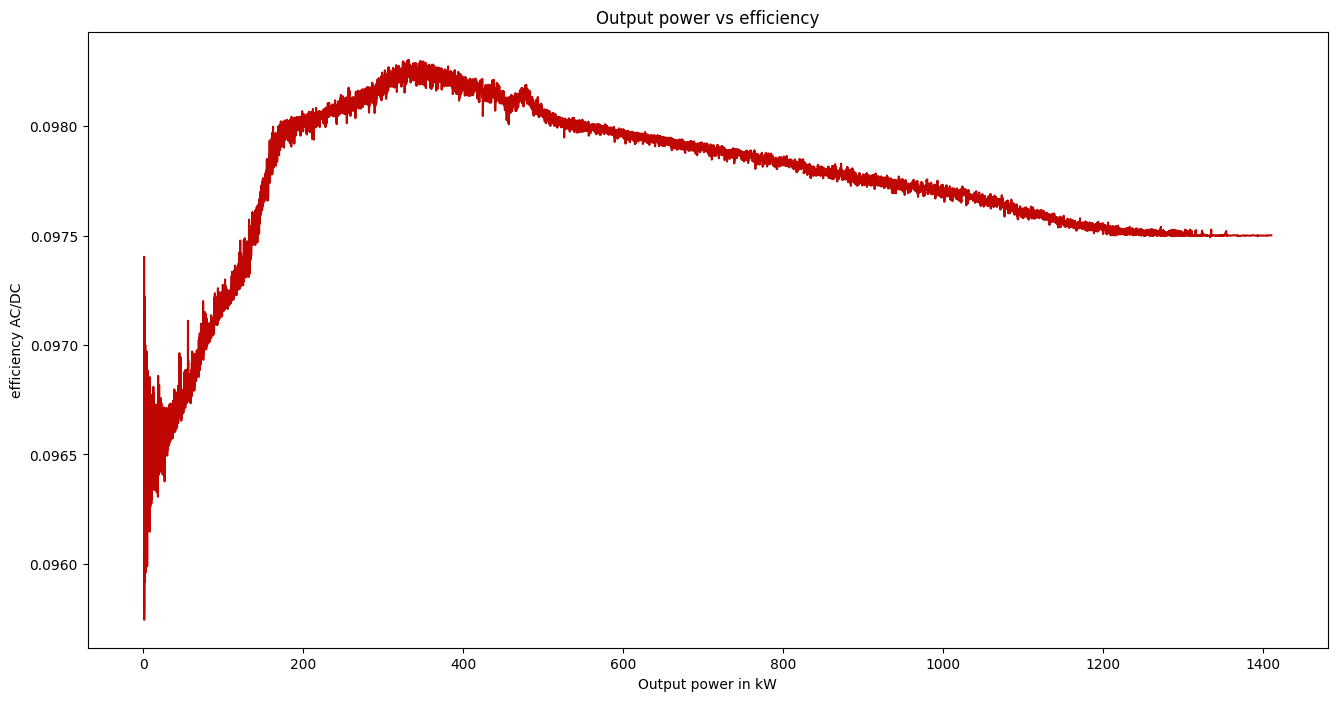

In [29]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()

print(DC_list)
DC_list.sort

res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='#bf0603')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

# Solar Power Prediction

In [13]:
solar2 = solar.copy()

X = solar2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
Y = solar2['AC_POWER']

In [14]:
X.sample(10)

DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
45053     6505.571    6.355e+06               24.615              25.335   
53939     6565.000    7.311e+06               22.014              20.857   
327          0.000    6.317e+06               24.879              23.710   
8687         4.286    7.628e+06               23.427              22.553   
62614        0.000    6.468e+06               22.552              21.520   
20147     2134.857    6.259e+06               29.841              58.034   
29858     1524.375    6.897e+06               24.859              32.482   
6265         0.000    6.204e+06               21.258              20.347   
19123     8002.000    7.183e+06               24.651              23.199   
45299        0.000    7.286e+06               22.335              20.134   

       IRRADIATION   DC_POWER  
45053        0.042    664.714  
53939        0.000      0.000  
327          0.000      0.000  
8687         0.013    181.286  
62614        0.000      0.000  
20147        0.892  11399.571  
29858        0.349   5378.375  
6265         0.000      0.000  
19123        0.000      0.000  
45299        0.000      0.000

In [15]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=21)

## Model Score and R^2 Score

### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)

score_lr = 100*lr_clf.score(X_test,Y_test)
print(f'LR Model score = {score_lr:4.4f}%')


y_pred_lr = lr_clf.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,Y_test) * 100, 2)

print("R2 Score (LR): ",R2_Score_lr,"%")

LR Model score = 99.9995%
R2 Score (LR):  100.0 %


### Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

raw_score_rfr = 100 * rfr.score(X_test, Y_test)
print(f'RF Model Raw Score: {raw_score_rfr:4.4f}%')

y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr, Y_test) * 100, 2)
print("R2 Score (RF):", R2_Score_rfr, "%")

RF Model Raw Score: 99.9999%
R2 Score (RF): 100.0 %


### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

raw_score_dtr = 100 * dtr.score(X_test, Y_test)
print(f'DT Model Raw Score: {raw_score_dtr:4.4f}%')

y_pred_dtr = dtr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr, Y_test) * 100, 2)
print("R2 Score (DT):", R2_Score_dtr, "%")

DT Model Raw Score: 99.9999%
R2 Score (DT): 100.0 %


# Result Prediction

### Linear Regression Prediction

In [20]:
lr_pred= lr_clf.predict(X_test)
print(lr_pred)

[1.58558020e-01 1.07278685e+03 2.98083620e+02 ... 6.69297020e+02
 3.76066021e+02 1.18389895e+02]


In [21]:
crosscheck_lr = pd.DataFrame({'Actual' : Y_test , 'Predicted' : lr_pred})
crosscheck_lr.head()

Actual  Predicted
43819     0.000      0.159
2949   1072.325   1072.787
33769   299.812    298.084
47825     0.000      0.299
29370     0.000      0.259

In [22]:
crosscheck_lr['Error'] = crosscheck_lr['Actual'] - crosscheck_lr['Predicted']
crosscheck_lr.head()

Actual  Predicted  Error
43819     0.000      0.159 -0.159
2949   1072.325   1072.787 -0.462
33769   299.812    298.084  1.729
47825     0.000      0.299 -0.299
29370     0.000      0.259 -0.259

In [23]:
crosscheckfinal_lr  = crosscheck_lr[crosscheck_lr['Error'] <= 20]
crosscheckfinal_lr.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

### Random Forest Prediction

In [24]:
prediction = rfr.predict(X_test)
print(prediction)

[   0.         1071.2932322   299.65082143 ...  669.392625    377.886
  117.48323215]


In [25]:
cross_checking = pd.DataFrame({'Actual' : Y_test , 'Predicted' : prediction})
cross_checking.head()

Actual  Predicted
43819     0.000      0.000
2949   1072.325   1071.293
33769   299.812    299.651
47825     0.000      0.000
29370     0.000      0.000

In [26]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

Actual  Predicted  Error
43819     0.000      0.000  0.000
2949   1072.325   1071.293  1.032
33769   299.812    299.651  0.162
47825     0.000      0.000  0.000
29370     0.000      0.000  0.000

In [27]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

### Decision Tree Prediction

In [28]:
dtr_pred = dtr.predict(X_test)
print(dtr_pred)

[   0.       1070.714286  299.8125   ...  669.3375    377.75
  117.4     ]


In [29]:
crosscheck_dtr = pd.DataFrame({'Actual' : Y_test , 'Predicted' : dtr_pred})
crosscheck_dtr.head()

Actual  Predicted
43819     0.000      0.000
2949   1072.325   1070.714
33769   299.812    299.812
47825     0.000      0.000
29370     0.000      0.000

In [30]:
crosscheck_dtr['Error'] = crosscheck_dtr['Actual'] - crosscheck_dtr['Predicted']
crosscheck_dtr.head()

Actual  Predicted  Error
43819     0.000      0.000  0.000
2949   1072.325   1070.714  1.611
33769   299.812    299.812  0.000
47825     0.000      0.000  0.000
29370     0.000      0.000  0.000

In [31]:
crosscheckfinal_dtr  = crosscheck_dtr[crosscheck_dtr['Error'] <= 20]
crosscheckfinal_dtr.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

# Training and Testing Score

In [32]:
# Linear Regression
# Calculate the training score
train_lr = lr_clf.score(X_train, Y_train)

# Calculate the testing score
test_lr = lr_clf.score(X_test, Y_test)

# Display results
print('Linear Regression: ')
print(f'Training Score: {train_lr}')
print(f'Testing Score:  {test_lr}')

# ------------------------------------------------------------------

# Random Forest
# Calculate the training score
train_rfr = rfr.score(X_train, Y_train)

# Calculate the testing score
test_rfr = rfr.score(X_test, Y_test)

# Display results
print('\nRandom Forest Regressor: ')
print(f'Training Score: {train_rfr}')
print(f'Testing Score:  {test_rfr}')

# ------------------------------------------------------------------

# Decision Tree
# Calculate the training score
train_dtr = dtr.score(X_train, Y_train)

# Calculate the testing score
test_dtr = dtr.score(X_test, Y_test)

# Display results
print('\nDecision Tree Regressor: ')
print(f'Training Score: {train_dtr}')
print(f'Testing Score:  {test_dtr}')


Linear Regression: 
Training Score: 0.9999926937585913
Testing Score:  0.9999945145759507

Random Forest Regressor: 
Training Score: 0.9999996292579003
Testing Score:  0.9999990589070717

Decision Tree Regressor: 
Training Score: 1.0
Testing Score:  0.9999987680804168
